<a href="https://colab.research.google.com/github/FGalvao77/TUTORIAL---TensorFlow-Keras-Construindo-RNA-para-classificacao/blob/main/TUTORIAL_TensorFlow_e_Keras_Construindo_RNA_para_classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUTORIAL - `TensorFlow & Keras`: Construindo _RNA_ para classificação**
---

Nesse tutorial iremos construir modelo de _Rede Neural Artificial_ para classificação, para isso, utilizaremos duas abordagens distintas na construção da arquitetura da rede. Sendo:
- a primeira, uma abordagem mais complexa com `TensorFlow` e `Keras`;
- já na segunda, utilizaremos uma abordagem mais "simples" com o `Keras`.

O intuito principal é explorar as formas de construção de RNA e a utilização de _libraries_ e todas as suas possibilidades.

Como material de consulta/apoio foi utilizado:
- https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br
- https://keras.io/guides/functional_api/

❗ Realizei algumas adaptações e, acrescentei outras linhas de códigos extras para enriquecer a atividade e fornecer uma melhor interpretabilidade da aplicação.

<font size=5>**TensorFlow & Keras**</font>
---

Como base de dados utilizaremos o dataset [Fashion MNIST](https://paperswithcode.com/dataset/fashion-mnist).

_Fashion-MNIST é um conjunto de dados composto por 28×28 imagens em tons de cinza de 70.000 produtos de moda de 10 categorias, com 7.000 imagens por categoria. O conjunto de treinamento possui 60.000 imagens e o conjunto de teste possui 10.000 imagens._

In [1]:
# importando as bibliotecas e funções necessárias
import numpy as np
import tensorflow as tf
from keras import datasets

# visualizando a versão do TensorFlow
print(tf.__version__)

2.8.0


In [2]:
# com a função ".datasets" importaremos o conjunto de dados e, instanciaremos no objeto "fashion_mnist"
fashion_mnist = datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# instanciando os dados de treino e teste e seus respetivos rótulos
(train_images, train_labels), (test_images, test_labels) = fashion_mnist

In [4]:
# instanciando a lista com a classe das roupas que cada imagem representa
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# visualizando a dimensão dos dados de treino
train_images.shape  

(60000, 28, 28)

In [6]:
# importando biblioteca para análise e manipulação de dados
import pandas as pd

In [8]:
# ordenando em ordem crescente e visualizando as classes das roupas
sorted(pd.Series(train_labels).unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [9]:
# visualizando a dimensão dos dados de teste
test_images.shape

(10000, 28, 28)

In [11]:
# importando as bibliotecas para visualização 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

# configurando ambiente para exibição gráfica
%matplotlib inline
sns.set()
rcParams['figure.figsize'] = 6,6

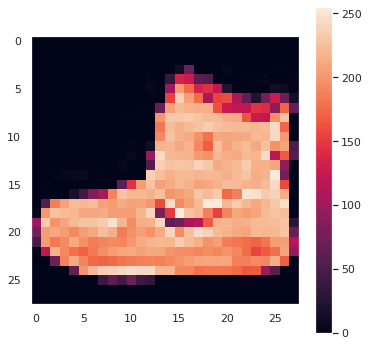

In [12]:
# visualizando a primeira imagem presente nos dados de treino
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

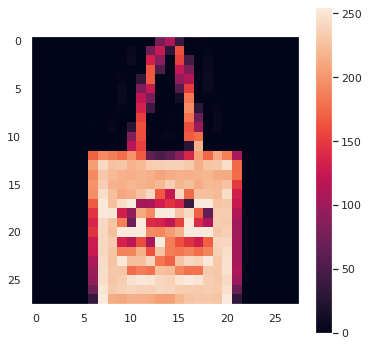

In [13]:
# realizando um sorteio aleatório de uma imagem e, exibindo a mesma
img = np.random.randint(0, train_images.shape[0])

plt.imshow(train_images[img])
# plt.imshow(train_images[img].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
# dimensão dos dados de treino e teste
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [15]:
# escalando os dados de treino e teste, de forma que os mesmos fiquem no intervalo de 0 e 1
# lembrando que a imagem é composta por 255 pixels
train_images = train_images / 255.0
test_images = test_images / 255.0

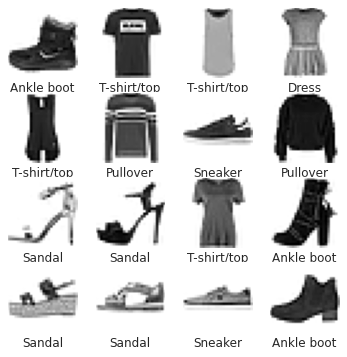

In [16]:
# visualizando as 16 primeiras imagens após o tratamento e o rótulo de cada imagem
# plt.figure(figsize=(16,12))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [18]:
# importando as funções necessárias para construção do modelo
from keras import Sequential, layers

In [19]:
# construindo a RNA
model = Sequential([
                    layers.Flatten(input_shape=(28, 28)),   # entrada da rede
                    layers.Dense(128, activation='relu'),   # camada intermediária
                    layers.Dense(10, activation='softmax')  # camada de saída
                    ])

In [20]:
# compilando a rede: otimizador, função de perda e métrica de avaliação
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# sumário do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [22]:
# importando função do keras
from tensorflow import keras

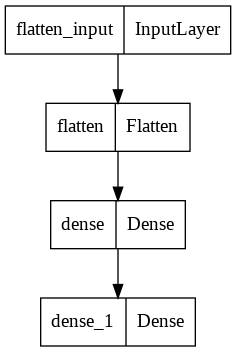

In [23]:
# plotando a estrutura da rede
keras.utils.plot_model(model, 'my_first_model.png')

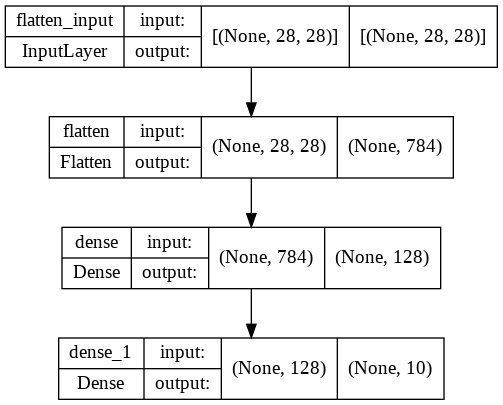

In [24]:
# plotando a estrutura da rede com seu "shape"
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

In [25]:
# treinando a rede
history = model.fit(x=train_images, y=train_labels, batch_size=10, epochs=10, 
                    validation_data=(test_images, test_labels), 
                    shuffle=True, validation_split=0.2)

Epoch 1/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.4951 - accuracy: 0.8229 - val_loss: 0.3895 - val_accuracy: 0.8600
Epoch 2/10
4800/4800 [==============================] - 18s 4ms/step - loss: 0.3762 - accuracy: 0.8630 - val_loss: 0.3815 - val_accuracy: 0.8612
Epoch 3/10
4800/4800 [==============================] - 17s 4ms/step - loss: 0.3385 - accuracy: 0.8738 - val_loss: 0.3762 - val_accuracy: 0.8648
Epoch 4/10
4800/4800 [==============================] - 18s 4ms/step - loss: 0.3131 - accuracy: 0.8852 - val_loss: 0.3738 - val_accuracy: 0.8624
Epoch 5/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.2958 - accuracy: 0.8911 - val_loss: 0.3286 - val_accuracy: 0.8848
Epoch 6/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.2824 - accuracy: 0.8947 - val_loss: 0.3420 - val_accuracy: 0.8802
Epoch 7/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.2689 - accuracy: 0.9015 - val_loss: 0.3669 - val_ac

In [32]:
# visualizando as métricas: perda e acurácia
test_scores = model.evaluate(test_images, test_labels, verbose=0)

print('Test loss:', round(test_scores[0], 4))
print('Test accuracy:', round(test_scores[1], 4))

Test loss: 0.4016
Test accuracy: 0.8724


In [33]:
# realizando as predições
predictions = model.predict(test_images)

In [34]:
# visualizando a primeira predição
predictions[0]

array([2.3177166e-07, 1.5015735e-13, 1.7880646e-12, 1.6142782e-17,
       5.6189792e-11, 6.1118387e-04, 2.5117649e-11, 1.1359989e-02,
       2.2085571e-10, 9.8802865e-01], dtype=float32)

In [35]:
# visualizando o valor máximo da predição
np.argmax(predictions[0])

9

In [36]:
# visualizando o rótulo do real do "test_labels"
test_labels[0]

9

In [39]:
# função para plotar a imagem e a probabilidade do rótulo
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

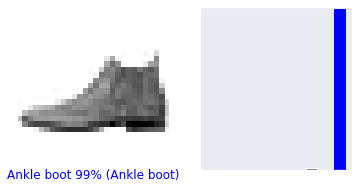

In [40]:
# instanciando a primeira imagem e visualizando-a e o seu rótulo (probabilidade)
i = 0

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

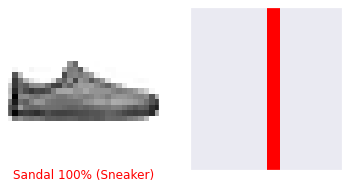

In [41]:
# instanciando outra imagem e visualizando-a e o seu rótulo (probabilidade)
i = 12

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

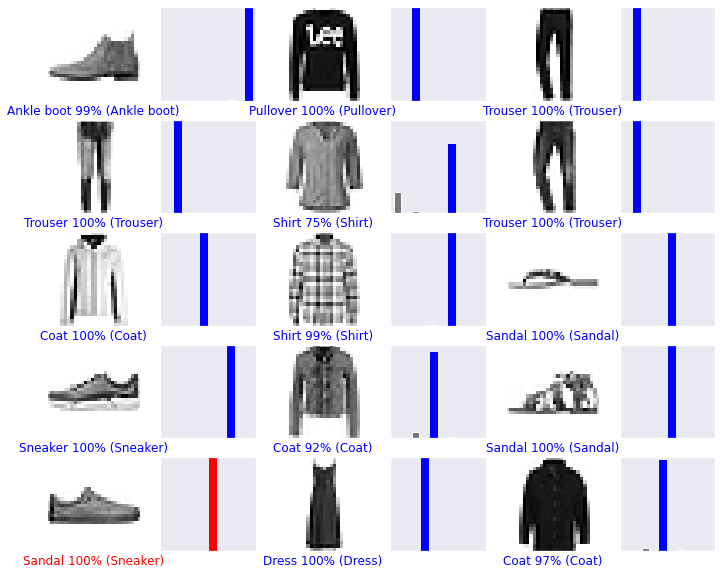

In [42]:
# plota o primeiro X de test images, e as labels preditas, e as labels verdadeiras
# colore as predições corretas de azul e as incorretas de vermelho
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [43]:
# pegando uma imagem do conjunto de dados de teste
img = test_images[0]

print(img.shape)

(28, 28)


In [44]:
# adicionando a imagem em um batch que possui um só membro
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [45]:
# realizando a predição da imagem instanciada acima
predictions_single = model.predict(img)

# visualizando o resultado
print(predictions_single)

[[2.3177100e-07 1.5015735e-13 1.7880715e-12 1.6142904e-17 5.6189900e-11
  6.1118562e-04 2.5117698e-11 1.1360005e-02 2.2085696e-10 9.8802865e-01]]


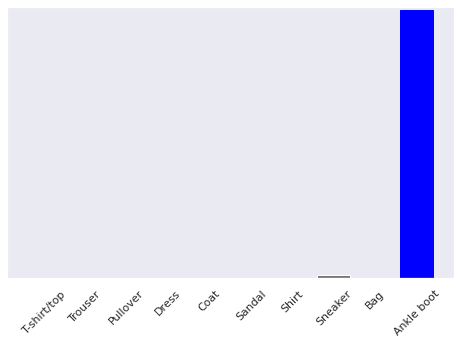

In [46]:
# plotando o rótulo da predição realizada
plt.figure(figsize=(8,5))
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [47]:
# visualizando o valor máximo da predição
np.argmax(predictions_single[0])

9

In [48]:
# importando métricas para avaliação do modelo
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
# visualizando o relatório do modelo
print(classification_report(test_labels, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1000
           1       0.95      0.98      0.96      1000
           2       0.82      0.72      0.77      1000
           3       0.95      0.77      0.85      1000
           4       0.73      0.87      0.79      1000
           5       0.96      0.97      0.96      1000
           6       0.67      0.71      0.69      1000
           7       0.95      0.94      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



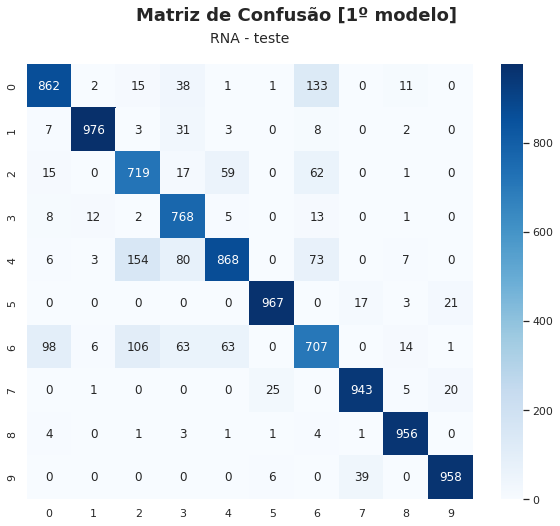

In [50]:
# visualizando graficamente a matriz de confusão dos dados de teste do modelo
fig = plt.figure(figsize=[10, 8])
fig.suptitle('Matriz de Confusão [1º modelo]', fontsize=18, fontweight='bold')

sns.heatmap(confusion_matrix(predictions.argmax(axis=1), test_labels), cmap='Blues', annot=True, fmt='.0f')
plt.title('RNA - teste\n', fontsize=14)
plt.xticks()
plt.yticks()

plt.show()

In [51]:
# visualizando as métricas presentes no modelo
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [52]:
# função para plotagem de gráficos com as métricas
def plot_performace(history, metric1='accuracy', metric2='loss'):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18,14))

    ax1.plot(history.history[metric1])
    ax1.plot(history.history['val_' + metric1])
    ax1.set_title('\nTraining & Validation - ' + metric1)
    ax1.set_ylabel('accuracy')
    ax1.set_xlabel('epochs')
    ax1.legend(['train_' + metric1, 
                'val_' + metric1])
    
    ax2.plot(history.history[metric2])
    ax2.plot(history.history['val_' + metric2])
    ax2.set_title('\nTraining & Validation - ' + metric2)
    ax2.set_ylabel('loss')
    ax2.set_xlabel('epochs')
    ax2.legend(['train_' + metric2, 
                'val_' + metric2])

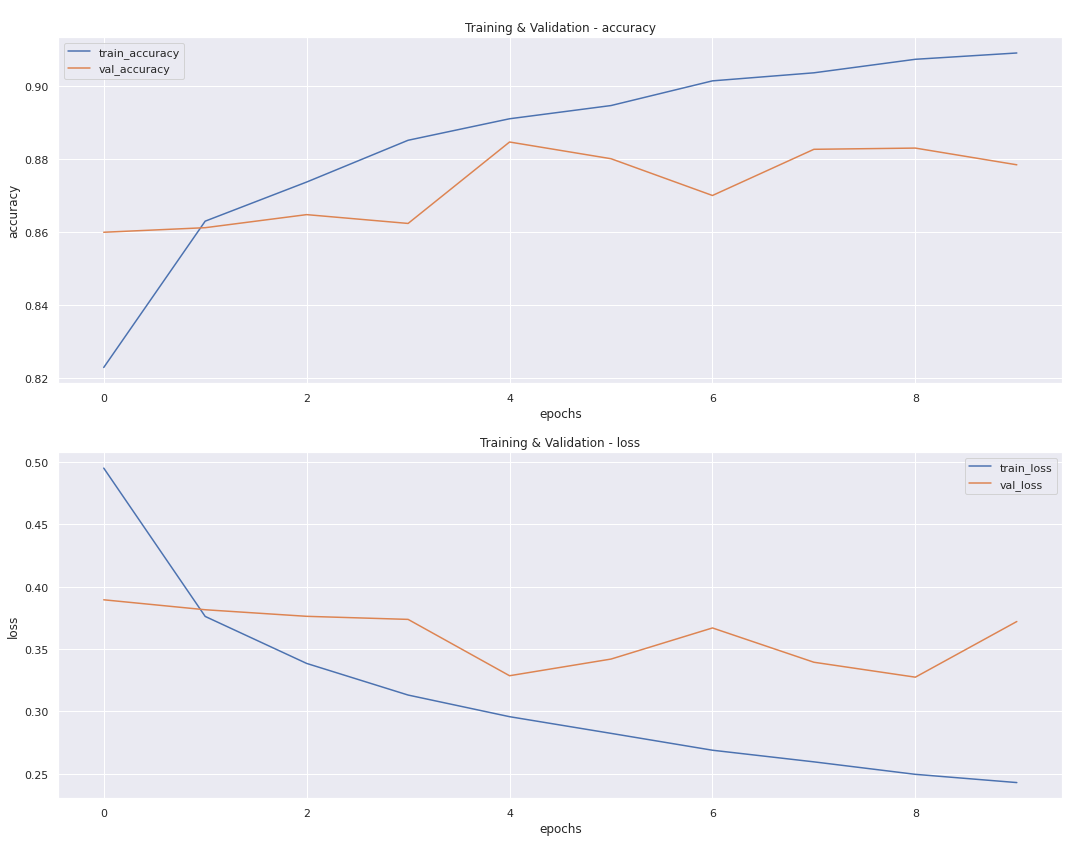

In [53]:
# plotando os gráficos
plot_performace(history)

<font size=5>**Keras**</font>
---

Agora utilizaremos o dataset [MNIST](http://yann.lecun.com/exdb/mnist/).

Esse conjunto de dados possui imagens de dígitos manuscritos, com um conjunto de treinamento de 60.000 exemplos e um conjunto de teste de 10.000 exemplos.

In [66]:
# importando a função do keras
from tensorflow import keras

# visualizando a versão do Keras
print(keras.__version__)

2.8.0


In [22]:
# instanciando o dados no objeto "mnist"
mnist = keras.datasets.mnist.load_data()

# separando os dados de treino e teste e seus respectivos rótulos
(X_train, y_train), (X_test, y_test) = mnist

In [23]:
# contabalilizando a quantidade de observações presentes em cada variável
len(X_train), len(y_train), len(X_test), len(y_test)

(60000, 60000, 10000, 10000)

In [24]:
# redimensionando (escalando) os dados de treino e teste
X_train = X_train.reshape(60_000, 784).astype('float32') / 255
X_test = X_test.reshape(10_000, 784).astype('float32') / 255

In [25]:
# dimensão dos conjuntos de treino e teste
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [26]:
# importando as demais bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# configurando o ambiente para exibição gráfica
%matplotlib inline
sns.set()

Número de imagens: 60000 | Pixels por imagem: 784
Imagem aleatória: 4



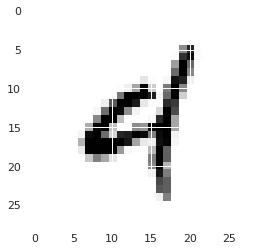

In [27]:
# definindo a semente aleatória
np.random.seed(42)

print(f'Número de imagens: {X_train.shape[0]} | Pixels por imagem: {X_train.shape[1]}')

# plotando a imagem
img = np.random.randint(0, X_train.shape[0])
print(f'Imagem aleatória: {y_train[img]}\n')
plt.imshow(X_train[img].reshape(28,28), cmap='Greys')
plt.show()

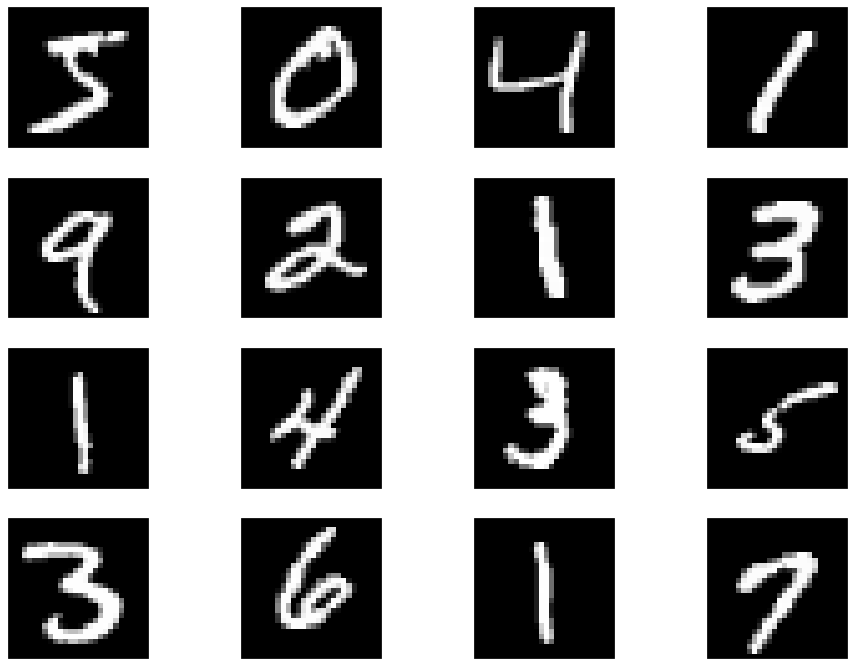

In [31]:
# visualizando as 16 primeiras imagens dos dados de treino
plt.figure(figsize=(16,12))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
plt.show()

In [8]:
# importando as funções necessaŕias para construção da rede neural artificial 
from keras import Model, layers

In [9]:
# construindo uma RNA simples

# entrada
img_inputs = layers.Input((X_train.shape[1], ))     # ou img_inputs = layers.Input((784, ))
# primeira camada oculta
hidden_1 = layers.Dense(128, activation='relu')(img_inputs)
# segunda camada ocultas
hidden_2 = layers.Dense(64, activation='relu')(hidden_1)
# camada de saída
img_outputs = layers.Dense(10, activation='softmax')(hidden_2)

# instanciando o modelo e, passando os argumentos de entrada (img_inputs), saída (img_outputs) 
# e definindo um nome para a rede de "MNIST_model"
model = Model(inputs=img_inputs, outputs=img_outputs, name='MNIST_model') 

# sumário do modelo
model.summary()

Model: "MNIST_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


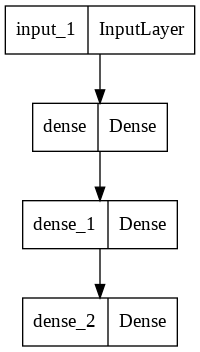

In [10]:
# plotando a estrutura da rede
keras.utils.plot_model(model, 'mnist_model.png')

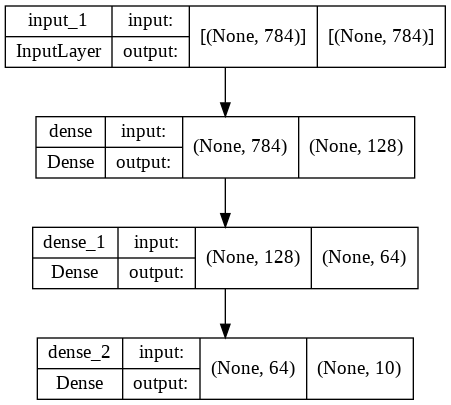

In [11]:
# plotando a estrutura da rede e com seu "shape"
keras.utils.plot_model(model, 'my_first_mnist_model_with_shape_info.png', show_shapes=True)

In [12]:
# compilando o modelo e definindo seu otimizador, função de perda e a métrica de avaliação
model.compile(
    optimizer='adam',   # optimizer=keras.optimizers.RMSprop(),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

In [13]:
# treinando o modelo com os dados de treino e, utilizando "batch_size=20", "epochs=50" e "validation_split=0.2"
history = model.fit(X_train, y_train, batch_size=20, epochs=50, validation_split=0.2)

Epoch 1/50
2400/2400 [==============================] - 10s 4ms/step - loss: 0.2522 - accuracy: 0.9255 - val_loss: 0.1478 - val_accuracy: 0.9566
Epoch 2/50
2400/2400 [==============================] - 12s 5ms/step - loss: 0.1117 - accuracy: 0.9655 - val_loss: 0.1146 - val_accuracy: 0.9661
Epoch 3/50
2400/2400 [==============================] - 9s 4ms/step - loss: 0.0761 - accuracy: 0.9766 - val_loss: 0.1080 - val_accuracy: 0.9681
Epoch 4/50
2400/2400 [==============================] - 11s 4ms/step - loss: 0.0570 - accuracy: 0.9821 - val_loss: 0.0948 - val_accuracy: 0.9740
Epoch 5/50
2400/2400 [==============================] - 9s 4ms/step - loss: 0.0452 - accuracy: 0.9854 - val_loss: 0.0974 - val_accuracy: 0.9732
Epoch 6/50
2400/2400 [==============================] - 8s 3ms/step - loss: 0.0389 - accuracy: 0.9872 - val_loss: 0.1088 - val_accuracy: 0.9716
Epoch 7/50
2400/2400 [==============================] - 13s 5ms/step - loss: 0.0305 - accuracy: 0.9899 - val_loss: 0.1050 - val_accur

In [15]:
# realizando as predições com o modelo
preds = model.predict(X_test)

# visualizando a primeira predição
preds[0]

array([1.2873379e-27, 9.8890533e-21, 3.7706478e-24, 5.1220258e-20,
       1.0249636e-32, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       3.7653421e-25, 4.0594522e-20], dtype=float32)

In [16]:
# visualizando o valor máximo da primera predição
np.argmax(preds[0])

7

In [17]:
# visualizando o rótulo real da imagem
y_test[0]

7

In [18]:
# visualizando as classes presente no objeto "y_test"
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [19]:
# importando biblioteca para análise e manipulação de dados
import pandas as pd

In [32]:
# ordenando em ordem crescente e visualizando as classes únicas
sorted(pd.Series(y_test).unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [33]:
# visualizando as predições das classes
preds.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [34]:
# ordenando em ordem crescente e visualizando as classes únicas
sorted(pd.Series(preds.argmax(axis=1)).unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [35]:
# importando as funções para gerar o relatório e gráfico da matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
# plotando o relatório do modelo
print(classification_report(y_test, preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.97      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



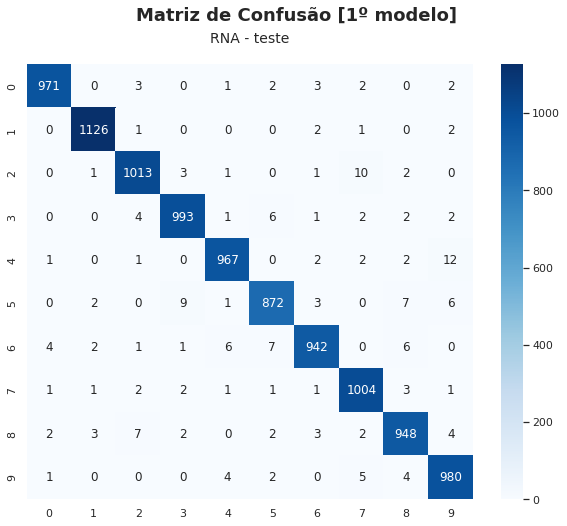

In [37]:
# visualizando graficamente a matriz de confusão dos dados de teste do modelo
fig = plt.figure(figsize=[10, 8])
fig.suptitle('Matriz de Confusão [1º modelo]', fontsize=18, fontweight='bold')

sns.heatmap(confusion_matrix(preds.argmax(axis=1), y_test), cmap='Blues', annot=True, fmt='.0f')
plt.title('RNA - teste\n', fontsize=14)
plt.xticks()
plt.yticks()

plt.show()

In [38]:
# visualizando as métricas do modelo
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [62]:
# função para plotagem de gráficos
def plot_performace(history, metric1='accuracy', metric2='loss'):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18,14))

    ax1.plot(history.history[metric1])
    ax1.plot(history.history['val_' + metric1])
    ax1.set_title('\nTraining & Validation - ' + metric1)
    ax1.set_ylabel('accuracy')
    ax1.set_xlabel('epochs')
    ax1.legend(['train_' + metric1, 
                'val_' + metric1])
    
    ax2.plot(history.history[metric2])
    ax2.plot(history.history['val_' + metric2])
    ax2.set_title('\nTraining & Validation - ' + metric2)
    ax2.set_ylabel('loss')
    ax2.set_xlabel('epochs')
    ax2.legend(['train_' + metric2, 
                'val_' + metric2])

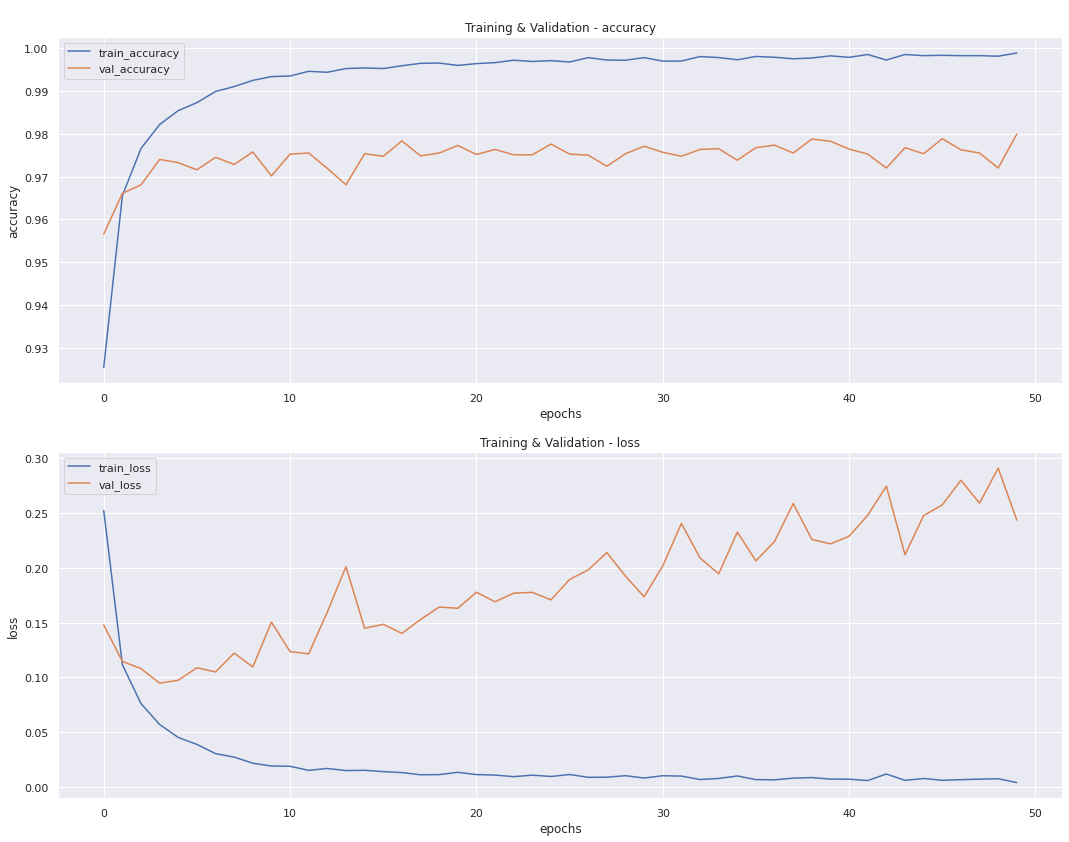

In [63]:
# plotando os gráficos
plot_performace(history)

> Note que a _acurácia_ do modelo nos **dados de treino** ficou muito próximo de `100%` e, já nos **dados de teste**, variou entre `97 e 98%`.<br><br>
E a função de perda (_loss_), nos _dados de treino_ atingiu uma normalidade com o passar das `épocas`, e já nos _dados de teste_ houve um "crescimento" ao longo do treinamento.

**Vamos tentar melhor o nosso modelo!**

Iremos ajustar outros argumentos do treinamento e, para posteriormente realizarmos toda avaliação desse novo modelo.

In [41]:
# ajustando outros argumentos de treinamento
history_2 = model.fit(x=X_train, y=y_train, batch_size=60, epochs=50, 
                      validation_data=(X_test, y_test), shuffle=True, 
                      validation_split=0.2)

Epoch 1/50
800/800 [==============================] - 6s 7ms/step - loss: 6.4634e-04 - accuracy: 0.9998 - val_loss: 0.2421 - val_accuracy: 0.9793
Epoch 2/50
800/800 [==============================] - 4s 5ms/step - loss: 3.6597e-05 - accuracy: 1.0000 - val_loss: 0.2317 - val_accuracy: 0.9805
Epoch 3/50
800/800 [==============================] - 4s 5ms/step - loss: 7.4393e-06 - accuracy: 1.0000 - val_loss: 0.2319 - val_accuracy: 0.9803
Epoch 4/50
800/800 [==============================] - 4s 5ms/step - loss: 5.4110e-06 - accuracy: 1.0000 - val_loss: 0.2320 - val_accuracy: 0.9803
Epoch 5/50
800/800 [==============================] - 4s 5ms/step - loss: 4.2280e-06 - accuracy: 1.0000 - val_loss: 0.2321 - val_accuracy: 0.9803
Epoch 6/50
800/800 [==============================] - 4s 5ms/step - loss: 3.3027e-06 - accuracy: 1.0000 - val_loss: 0.2322 - val_accuracy: 0.9803
Epoch 7/50
800/800 [==============================] - 4s 5ms/step - loss: 2.5846e-06 - accuracy: 1.0000 - val_loss: 0.2328 -

In [42]:
# realizando as predições com o modelo ajustado
preds_2 = model.predict(X_test)
preds_2[0]  # visualizando a primeira predição

array([3.0678975e-34, 1.0642843e-28, 1.3171529e-34, 7.6952981e-26,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       2.7720282e-33, 5.4838307e-25], dtype=float32)

In [43]:
# visualizando o valor máximo da primeira predição
np.argmax(preds_2[0])

7

In [46]:
# visualizando o valor real do rótulo da imagem
y_test[0]

7

In [47]:
# visualizando novamente o relatório do modelo ajustado
print(classification_report(y_test, preds_2.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [48]:
# visualizando as métricas do modelo do ajustado
history_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

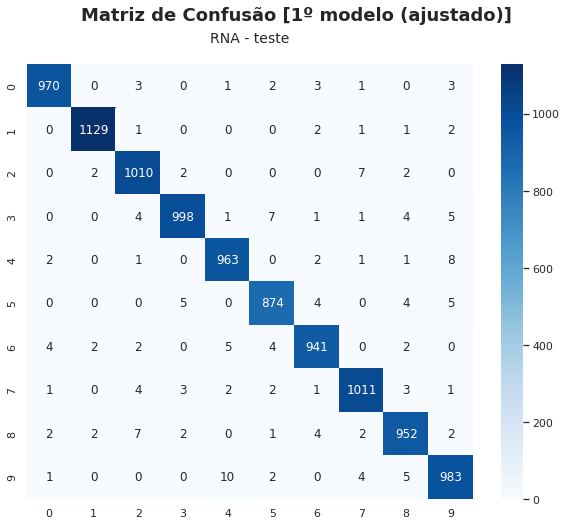

In [49]:
# visualizando graficamente a matriz de confusão dos dados de teste do modelo ajustado
fig = plt.figure(figsize=[10, 8])
fig.suptitle('Matriz de Confusão [1º modelo (ajustado)]', fontsize=18, fontweight='bold')

sns.heatmap(confusion_matrix(preds_2.argmax(axis=1), y_test), cmap='Blues', annot=True, fmt='.0f')
plt.title('RNA - teste\n', fontsize=14)
plt.xticks()
plt.yticks()

plt.show()

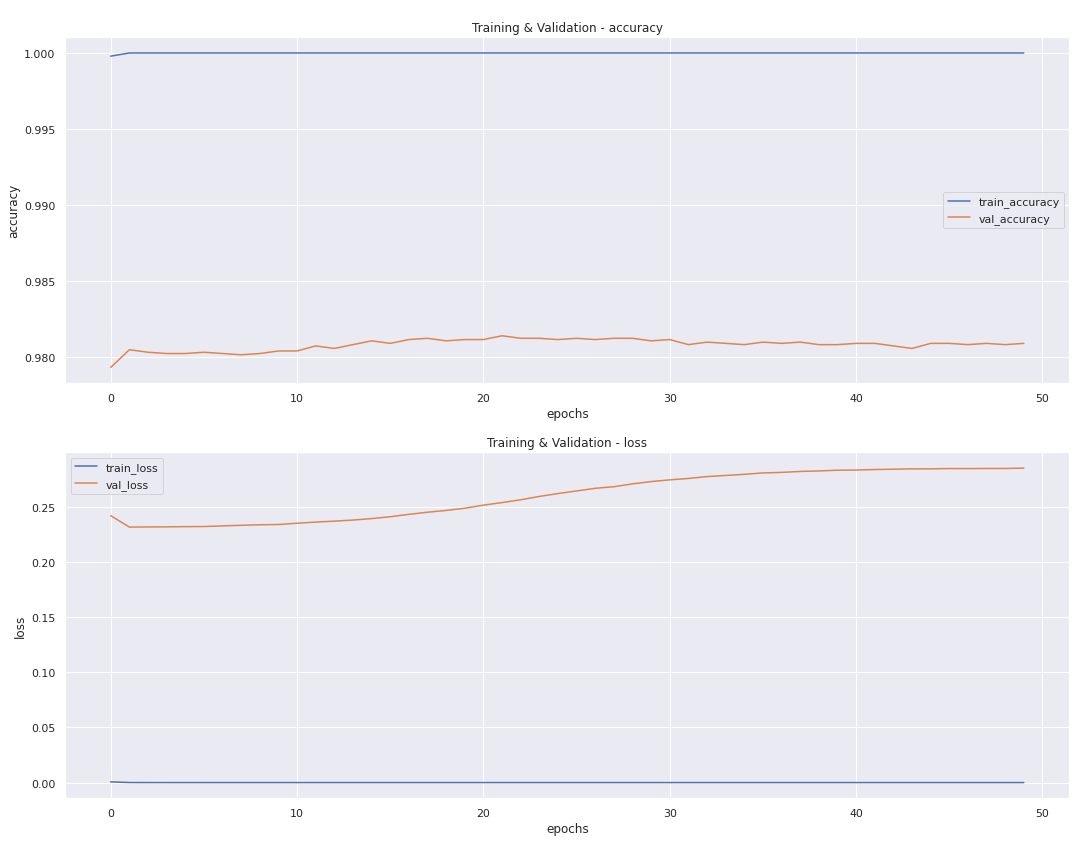

In [64]:
# plotando os gráficos do modelo ajustado
plot_performace(history_2)

> Esse modelo apresentou poucas "melhorias" em relação ao anterior!

**Vamos ajustar a nossa rede e, realizar todas as etapas novamente!**

Para isso, incluirei entre as _camadas ocultas_ a função `Dropout`.

_"A camada Dropout define aleatoriamente as unidades de entrada para 0 com uma frequência de rate a cada etapa durante o tempo de treinamento, o que ajuda a evitar o overfitting."_

- https://keras.io/api/layers/regularization_layers/dropout/

In [51]:
# construindo uma segunda rede, onde será inclusa a função ".Dropout" entre as camadas ocultas
# e manteremos as demais estruturas da rede conforme já foi definido anteriormente

# entrada
img_inputs = layers.Input((X_train.shape[1], ))     # ou img_inputs = layers.Input((784, ))
# primeira camada oculta
hidden_1 = layers.Dense(128, activation='relu')(img_inputs)
drop_1 = layers.Dropout(0.5)(hidden_1)

# segunda camada oculta
hidden_2 = layers.Dense(64, activation='relu')(drop_1)
drop_2 = layers.Dropout(0.5)(hidden_2)

# camada de saída
img_outputs = layers.Dense(10, activation='softmax')(drop_2)

# instanciando o modelo e, passando os argumentos de entrada (img_inputs), saída (img_outputs) 
# e definindo um nome para a rede com "MNIST_model_2"
model_2 = Model(inputs=img_inputs, outputs=img_outputs, name='MNIST_model_2') 

# sumário do modelo
model_2.summary()

Model: "MNIST_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-t

In [52]:
# compilando o modelo e utilizando os mesmos argumentos anteriores
model_2.compile(
    optimizer='adam',   # optimizer=keras.optimizers.RMSprop(),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

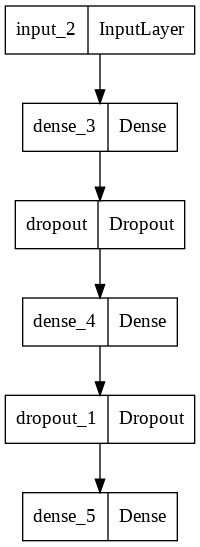

In [53]:
# plotando a estrutura da rede do segundo modelo
keras.utils.plot_model(model_2, 'mnist_model_2.png')

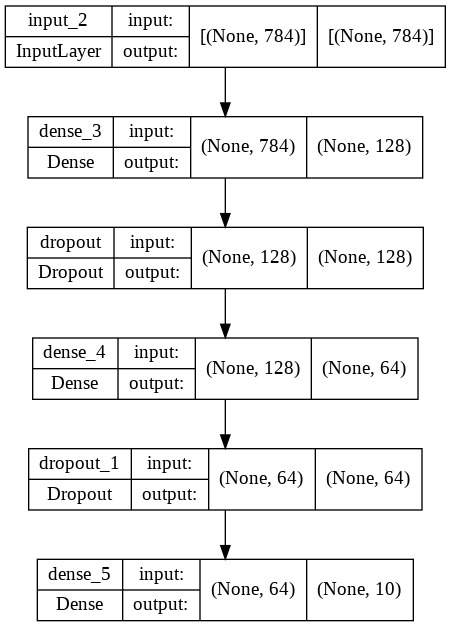

In [54]:
# plotando a estrutura da rede e com seu "shape" do segundo modelo
keras.utils.plot_model(model_2, 'my_first_mnist_model_2_with_shape_info.png', show_shapes=True)

In [55]:
# treinando o segundo modelo com os mesmos argumentos do último treinamento
history_3 = model_2.fit(x=X_train, y=y_train, batch_size=60, epochs=50, 
                        validation_data=(X_test, y_test), shuffle=True, 
                        validation_split=0.2)

Epoch 1/50
800/800 [==============================] - 4s 5ms/step - loss: 0.7055 - accuracy: 0.7799 - val_loss: 0.2221 - val_accuracy: 0.9348
Epoch 2/50
800/800 [==============================] - 4s 5ms/step - loss: 0.3571 - accuracy: 0.8992 - val_loss: 0.1699 - val_accuracy: 0.9513
Epoch 3/50
800/800 [==============================] - 4s 5ms/step - loss: 0.2969 - accuracy: 0.9158 - val_loss: 0.1502 - val_accuracy: 0.9579
Epoch 4/50
800/800 [==============================] - 4s 6ms/step - loss: 0.2654 - accuracy: 0.9272 - val_loss: 0.1365 - val_accuracy: 0.9601
Epoch 5/50
800/800 [==============================] - 5s 7ms/step - loss: 0.2433 - accuracy: 0.9330 - val_loss: 0.1219 - val_accuracy: 0.9658
Epoch 6/50
800/800 [==============================] - 5s 6ms/step - loss: 0.2215 - accuracy: 0.9380 - val_loss: 0.1183 - val_accuracy: 0.9668
Epoch 7/50
800/800 [==============================] - 6s 8ms/step - loss: 0.2109 - accuracy: 0.9406 - val_loss: 0.1158 - val_accuracy: 0.9678
Epoch 

In [56]:
# realizando as predições com o segundo modelo
preds_3 = model_2.predict(X_test)
preds_3[0]  # visualizando a primeira predição

array([6.66003030e-26, 3.71470351e-13, 1.15147676e-10, 1.65413139e-09,
       2.26975853e-19, 7.49891609e-16, 6.65839561e-36, 1.00000000e+00,
       9.90234067e-21, 3.30004248e-15], dtype=float32)

In [57]:
# visualizando o valor máximo da primeira predição
np.argmax(preds_3[0])

7

In [58]:
# visualizando o valor real do rótulo
y_test[0]

7

In [59]:
# visualizando o relatório do segundo modelo
print(classification_report(y_test, preds_3.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.95      0.96       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



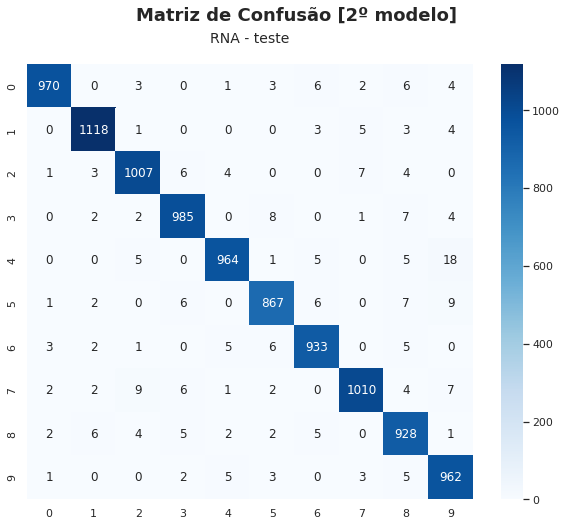

In [60]:
# visualizando graficamente a matriz de confusão dos dados de teste do segundo modelo
fig = plt.figure(figsize=[10, 8])
fig.suptitle('Matriz de Confusão [2º modelo]', fontsize=18, fontweight='bold')

sns.heatmap(confusion_matrix(preds_3.argmax(axis=1), y_test), cmap='Blues', annot=True, fmt='.0f')
plt.title('RNA - teste\n', fontsize=14)
plt.xticks()
plt.yticks()

plt.show()

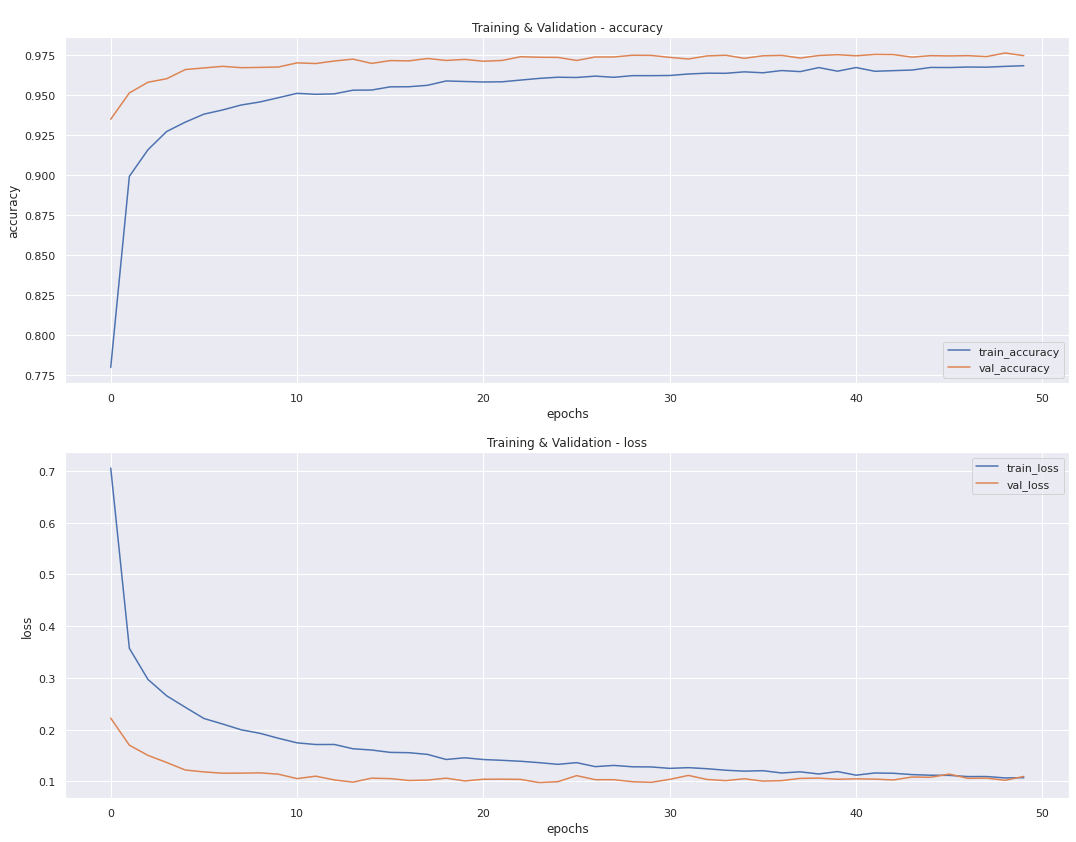

In [65]:
# plotando os gráficos do segundo modelo
plot_performace(history_3)

> Veja que, com a inclusão da função `Dropout` o modelo apresentou uma melhora considerável em relação a distância da _acurácia_ entre os dados de treinamento e de teste. Outro detalhe, é que houve uma pequena perda na acurácia nos dados de treinamento, porém nos dados de teste se manteve muito próximo ao modelo anterior.<br><br> Já em relação ao _loss_, temos uma "tendência" de convergência.

Instalando a biblioteca `session_info` para visualizarmos as versões das bibliotecas/funções utilizadas no notebook.

In [ ]:
!pip install session_info

     |████████████████████████████████| 63 kB 1.2 MB/s 
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8048 sha256=279b69b5503d9d8df2e8e564549a877fec4bc43f3437c5d6045445dfe49fa2f9
  Stored in directory: /root/.cache/pip/wheels/bd/ad/14/6a42359351a18337a8683854cfbba99dd782271f2d1767f87f
Successfully built session-info


In [ ]:
# importando a biblioteca
import session_info

# visualizando as versões das bibliotecas e/ou funções utilizadas no notebook
session_info.show(html=False)

-----
keras               2.8.0
matplotlib          3.2.2
numpy               1.21.5
pandas              1.3.5
seaborn             0.11.2
session_info        1.0.0
sklearn             1.0.2
-----
IPython             5.5.0
jupyter_client      5.3.5
jupyter_core        4.9.2
notebook            5.3.1
-----
Python 3.7.12 (default, Jan 15 2022, 18:48:18) [GCC 7.5.0]
Linux-5.4.144+-x86_64-with-Ubuntu-18.04-bionic
-----
Session information updated at 2022-03-11 01:25


<font size=5>**Conclusão final**</font>
---

Acho que esse tutorial foi possível passar uma visão geral da utilização do `TensorFlow` e do `Keras` e suas possibilidades para construção de RNA. Porém há muito o que explorar dessas _libraries_ para construção de redes muito mais complexas.

Portanto explore a documentação oficial das bibliotecas e divirta-se!